   # Data Analysis and Visualization of top Smartwatch Brands       

Even if you have your smartphone close by while out and about, you probably have been in asituation where you took your eyes off it just for a while, then you find out that you missed a really urgent call or message. By connecting a smartwatch or connected watch to your smartphone, you can instantly receive notifications. Even if your smartphone is just nearby, you still need to be aware of it and check it every so often. With these watches, on the other hand, you wouldn't need to worry about missing anything important as you can be alerted to notifications by simply wearing one on your wrist.

The top smartwatch brands analyzed here are APPLE, Noise, boAt, Honor, SAMSUNG, FITBIT, Amazfit,GARMIN, Huawei and FOSSIL

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from matplotlib import font_manager, rc
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df=pd.read_csv('smartwatch_data2.csv')

# Dataset

The dataset used for the analysis and visualization purposes consists of thefollowing fields:

1. Product URL: It is the address of a particular product on the web.
2. Product Name: It identifies a specific product.
3. Brand: It represents the brand the product belongs to, for example, Nike.
4. MRP: It is the market price of a product.
5. Sales Price: It is the price of a product after applying discounts.
6. Discount Percentage: It is the percentage deducted from the MRP of a product.
7. Number of Reviews: It is the total number of reviews a product has.
8. Star Rating: It is a field used as a relative measure of performance. Higher the rating, the better the performance.

In [3]:
df.head()

,Product_url,Product_name,Brand,Sale_price,MRP,Discount_percentage,Memory,No_of_ratings,No_of_reviews,Star_rating,Description
0,https://www.flipkart.com/apple-watch-series-3-...,"APPLE Watch Series 3 (GPS, 42mm) - Space Grey ...",APPLE,"23,349","23,900",2,8,"55,019","4,837",4.6,"Check your heart rate, and get notifications f..."
1,https://www.flipkart.com/apple-watch-series-8-...,APPLE Watch Series 8 GPS,APPLE,"48,900","48,900",0,32,67,5,4.3,"{'Sales Package': 'Smartwatch, Strap, 1m Magne..."
2,https://www.flipkart.com/apple-watch-se-gps-ce...,"APPLE Watch SE (GPS+Cellular, 44mm) Space Grey...",APPLE,"36,900","36,900",0,32,"3,278",245,4.6,With powerful features to help keep you connec...
3,https://www.flipkart.com/apple-watch-series7-g...,"APPLE Watch Series7 (GPS, 45mm) - Blue Alumini...",APPLE,"44,544","44,900",0,32,"2,479",145,4.6,"The largest, most advanced Always-on Retina di..."
4,https://www.flipkart.com/apple-watch-series7-g...,"APPLE Watch Series7 (GPS, 41mm) - Starlight Al...",APPLE,"41,900","41,900",0,32,"2,479",145,4.6,"The largest, most advanced Always-on Retina di..."


In [4]:
df['Brand'].unique()

array(['APPLE', 'Noise', 'boAt', 'Honor', 'SAMSUNG', 'FITBIT', 'Amazfit',
       'GARMIN', 'Huawei', 'FOSSIL'], dtype=object)

In [5]:
df.shape

(957, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_url          957 non-null    object 
 1   Product_name         957 non-null    object 
 2   Brand                957 non-null    object 
 3   Sale_price           957 non-null    object 
 4   MRP                  957 non-null    object 
 5   Discount_percentage  957 non-null    int64  
 6   Memory               957 non-null    object 
 7   No_of_ratings        957 non-null    object 
 8   No_of_reviews        957 non-null    object 
 9   Star_rating          957 non-null    float64
 10  Description          957 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 82.4+ KB


In [7]:
df.isna().sum()

Product_url            0
Product_name           0
Brand                  0
Sale_price             0
MRP                    0
Discount_percentage    0
Memory                 0
No_of_ratings          0
No_of_reviews          0
Star_rating            0
Description            0
dtype: int64

In [8]:
df.duplicated().any()

True

In [9]:
df.duplicated().sum()

57

In [10]:
df=df.drop_duplicates()
df.head()

,Product_url,Product_name,Brand,Sale_price,MRP,Discount_percentage,Memory,No_of_ratings,No_of_reviews,Star_rating,Description
0,https://www.flipkart.com/apple-watch-series-3-...,"APPLE Watch Series 3 (GPS, 42mm) - Space Grey ...",APPLE,"23,349","23,900",2,8,"55,019","4,837",4.6,"Check your heart rate, and get notifications f..."
1,https://www.flipkart.com/apple-watch-series-8-...,APPLE Watch Series 8 GPS,APPLE,"48,900","48,900",0,32,67,5,4.3,"{'Sales Package': 'Smartwatch, Strap, 1m Magne..."
2,https://www.flipkart.com/apple-watch-se-gps-ce...,"APPLE Watch SE (GPS+Cellular, 44mm) Space Grey...",APPLE,"36,900","36,900",0,32,"3,278",245,4.6,With powerful features to help keep you connec...
3,https://www.flipkart.com/apple-watch-series7-g...,"APPLE Watch Series7 (GPS, 45mm) - Blue Alumini...",APPLE,"44,544","44,900",0,32,"2,479",145,4.6,"The largest, most advanced Always-on Retina di..."
4,https://www.flipkart.com/apple-watch-series7-g...,"APPLE Watch Series7 (GPS, 41mm) - Starlight Al...",APPLE,"41,900","41,900",0,32,"2,479",145,4.6,"The largest, most advanced Always-on Retina di..."


In [11]:
df.shape

(900, 11)

In [12]:
df['Sale_price'] = df['Sale_price'].replace(['No price available'], 0)
df['MRP'] = df['MRP'].replace(['No price available'], 0)
df['Memory'] = df['Memory'].replace(['Memory data not available'], 0)

In [13]:
df = df[df['MRP'] != 0]

In [14]:
df.shape

(896, 11)

In [15]:
df['Sale_price']=df["Sale_price"].str.replace(",","")
df['MRP']=df["MRP"].str.replace(",","")
df['No_of_ratings']=df["No_of_ratings"].str.replace(",","")
df['No_of_reviews']=df["No_of_reviews"].str.replace(",","")

df['Sale_price'] = df['Sale_price'].astype(float)
df['MRP'] = df['MRP'].astype(float)
df['Memory'] = df['Memory'].astype(float) 
df['No_of_ratings'] = df['No_of_ratings'].astype(float) 
df['No_of_reviews'] = df['No_of_reviews'].astype(float)
df['Discount_percentage'] = df['Discount_percentage'].astype(float)                                               

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 956
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_url          896 non-null    object 
 1   Product_name         896 non-null    object 
 2   Brand                896 non-null    object 
 3   Sale_price           896 non-null    float64
 4   MRP                  896 non-null    float64
 5   Discount_percentage  896 non-null    float64
 6   Memory               896 non-null    float64
 7   No_of_ratings        896 non-null    float64
 8   No_of_reviews        896 non-null    float64
 9   Star_rating          896 non-null    float64
 10  Description          896 non-null    object 
dtypes: float64(7), object(4)
memory usage: 84.0+ KB


In [17]:
df.describe()

,Sale_price,MRP,Discount_percentage,Memory,No_of_ratings,No_of_reviews,Star_rating
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,28450.223214,31667.988839,18.664062,8.170759,12315.143973,1155.973214,3.540402
std,23482.328127,23125.432317,21.937949,12.916356,64203.348597,5824.859952,1.634597
min,1499.000000,3999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.000000,14995.000000,0.000000,0.000000,17.000000,1.000000,3.900000
50%,21945.000000,25990.000000,9.000000,0.000000,274.000000,26.000000,4.200000
75%,40900.000000,42990.000000,34.000000,16.000000,2303.500000,228.000000,4.500000
max,129990.000000,139990.000000,74.000000,32.000000,607488.000000,54226.000000,5.000000


In [18]:
count_dis = df['Discount_percentage'].value_counts()[0]
count_rating = df['No_of_ratings'].value_counts()[0]
count_review = df['No_of_reviews'].value_counts()[0]

In [19]:
# check
print(count_dis)
print(count_rating)
print(count_review)

386
152
187


# Analysis and Visualization

In [20]:
df['Brand'].unique()

array(['APPLE', 'Noise', 'boAt', 'Honor', 'SAMSUNG', 'FITBIT', 'Amazfit',
       'GARMIN', 'Huawei', 'FOSSIL'], dtype=object)

In [21]:
df_dis=pd.DataFrame(df[['Brand','Discount_percentage']].loc[df['Discount_percentage']!=0])
df_dis['Discount_percentage'].groupby(df['Brand']).count().sort_values(ascending=False) 
df_dis

,Brand,Discount_percentage
0,APPLE,2.0
16,APPLE,4.0
26,APPLE,9.0
87,APPLE,4.0
178,APPLE,33.0
...,...,...
950,FOSSIL,44.0
951,FOSSIL,60.0
952,FOSSIL,40.0
953,FOSSIL,29.0


In [22]:
df_Brand=pd.DataFrame(df['Brand'].groupby(df['Brand']).count().sort_values(ascending=False))
df_Brand.rename(columns={'Brand':'Brand_count'},inplace=True)
df_Brand.reset_index(inplace=True)

df_min_MRP=pd.DataFrame(df['MRP'].groupby(df['Brand']).min().sort_values(ascending=False))
df_min_MRP.reset_index(inplace=True)
df_min_MRP.rename(columns={'MRP':'Min_MRP'},inplace=True)

df_max_MRP=pd.DataFrame(df['MRP'].groupby(df['Brand']).max().sort_values(ascending=False))
df_max_MRP.reset_index(inplace=True)
df_max_MRP.rename(columns={'MRP':'Max_MRP'},inplace=True)
 
df_min_sale=pd.DataFrame(df['Sale_price'].groupby(df['Brand']).min().sort_values(ascending=False))
df_min_sale.reset_index(inplace=True)
df_min_sale.rename(columns={'Sale_price':'Min_sale_price'},inplace=True)

df_max_sale=pd.DataFrame(df['Sale_price'].groupby(df['Brand']).max().sort_values(ascending=False))
df_max_sale.reset_index(inplace=True)
df_max_sale.rename(columns={'Sale_price':'Max_sale_price'},inplace=True)

df_dis_count=pd.DataFrame(df_dis['Discount_percentage'].groupby(df_dis['Brand']).count().sort_values(ascending=False))
df_dis_count.reset_index(inplace=True)
df_dis_count.rename(columns={'Discount_percentage':'Discount_count'},inplace=True)

df_avg_discount=pd.DataFrame(df['Discount_percentage'].groupby(df['Brand']).mean().sort_values(ascending=False))
df_avg_discount.reset_index(inplace=True)
df_avg_discount.rename(columns={'Discount_percentage':'Avg_discount%'},inplace=True)

df_avg_rating=pd.DataFrame(df['Star_rating'].groupby(df['Brand']).mean().sort_values(ascending=False))
df_avg_rating.reset_index(inplace=True)
df_avg_rating.rename(columns={'Star_rating':'Avg_rating'},inplace=True)

df_avg_no_of_ratings=pd.DataFrame(df['No_of_ratings'].groupby(df['Brand']).mean().sort_values(ascending=False))
df_avg_no_of_ratings.reset_index(inplace=True)
df_avg_no_of_ratings.rename(columns={'No_of_ratings':'Avg_no_of_ratings'},inplace=True)

df_avg_no_of_reviews=pd.DataFrame(df['No_of_reviews'].groupby(df['Brand']).mean().sort_values(ascending=False))
df_avg_no_of_reviews.reset_index(inplace=True)
df_avg_no_of_reviews.rename(columns={'No_of_reviews':'Avg_no_of_reviews'},inplace=True)


df_memory=pd.DataFrame(df['Memory'].groupby(df['Brand']).mean().sort_values(ascending=False))
df_memory.reset_index(inplace=True)
df_memory.rename(columns={'Memory':'Avg_memory'},inplace=True) 

In [23]:
df1=reduce(lambda x,y: pd.merge(x,y, on='Brand'),[df_Brand,df_max_MRP, df_min_MRP,df_max_sale,df_min_sale,df_dis_count,df_avg_discount,df_avg_rating,df_avg_no_of_ratings,df_avg_no_of_reviews,df_memory])
df1       

,Brand,Brand_count,Max_MRP,Min_MRP,Max_sale_price,Min_sale_price,Discount_count,Avg_discount%,Avg_rating,Avg_no_of_ratings,Avg_no_of_reviews,Avg_memory
0,APPLE,266,89900.0,20900.0,89900.0,20900.0,8,0.496241,4.475940,3374.492481,292.060150,23.849624
1,GARMIN,171,139990.0,8990.0,129990.0,8990.0,136,15.076023,1.899415,9.859649,1.228070,0.707602
2,FOSSIL,108,24995.0,7036.0,24995.0,5398.0,51,16.120370,3.776852,517.944444,54.675926,2.101852
3,Noise,96,8999.0,3999.0,6055.0,1499.0,94,46.104167,3.501042,34504.218750,3563.062500,0.000000
4,boAt,64,11999.0,5990.0,4499.0,1499.0,64,60.312500,3.775000,98713.078125,8781.171875,0.000000
5,SAMSUNG,59,60241.0,15885.0,50408.0,11177.0,54,19.000000,4.054237,4467.050847,437.542373,9.288136
6,FITBIT,51,26499.0,9900.0,26499.0,6948.0,30,10.666667,2.719608,1080.411765,105.686275,0.000000
7,Amazfit,47,25999.0,4999.0,23999.0,2999.0,43,27.531915,3.278723,1008.425532,96.978723,0.000000
8,Huawei,21,30990.0,9999.0,29999.0,6990.0,17,32.571429,3.938095,725.380952,114.666667,1.761905
9,Honor,13,20999.0,10999.0,17999.0,4999.0,13,26.384615,4.346154,5215.538462,748.384615,3.384615


# Heatmap

The following features are seen to be correlated with each other:
1. Average discount percentage is showing a good positive correlation with Average number of ratings and Average   number of reviews.
2. Minimum MRP and Minimum sale price are also seen to be highly positively correlated.

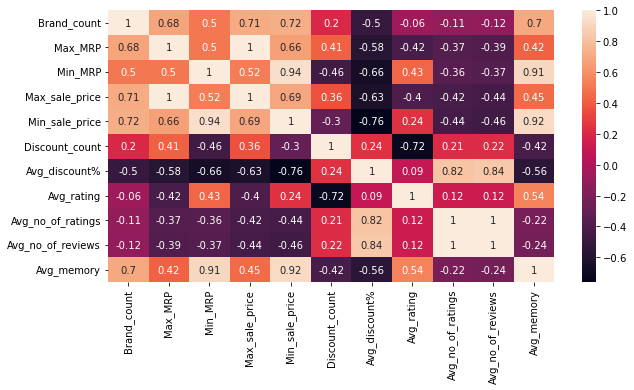

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(np.round(df1.corr(),2),annot=True)
plt.show() 

# Histogram

array([[<AxesSubplot:title={'center':'Brand_count'}>,
        <AxesSubplot:title={'center':'Max_MRP'}>,
        <AxesSubplot:title={'center':'Min_MRP'}>],
       [<AxesSubplot:title={'center':'Max_sale_price'}>,
        <AxesSubplot:title={'center':'Min_sale_price'}>,
        <AxesSubplot:title={'center':'Discount_count'}>],
       [<AxesSubplot:title={'center':'Avg_discount%'}>,
        <AxesSubplot:title={'center':'Avg_rating'}>,
        <AxesSubplot:title={'center':'Avg_no_of_ratings'}>],
       [<AxesSubplot:title={'center':'Avg_no_of_reviews'}>,
        <AxesSubplot:title={'center':'Avg_memory'}>, <AxesSubplot:>]],
      dtype=object)

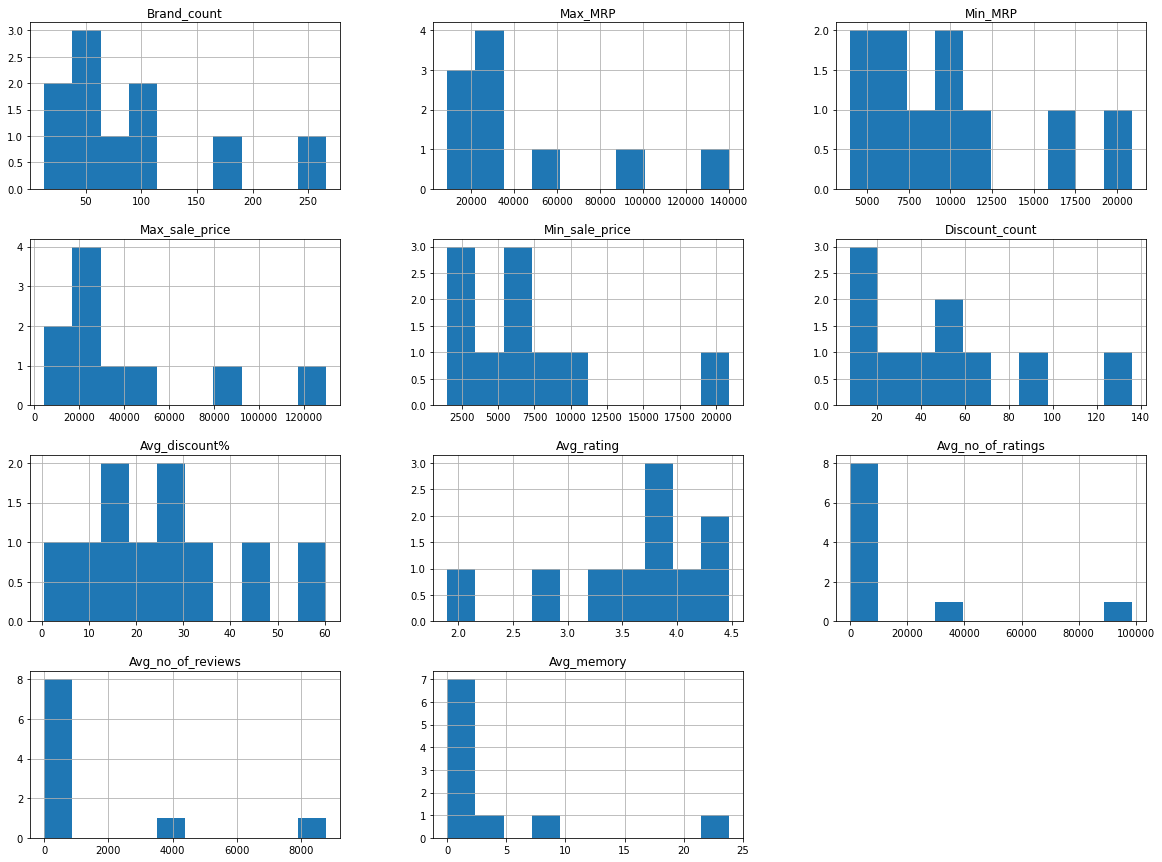

In [25]:
plt.rcParams["figure.figsize"] = (20,15)
df1.hist()

# Product range

In [26]:
df1[['Brand','Brand_count']]

,Brand,Brand_count
0,APPLE,266
1,GARMIN,171
2,FOSSIL,108
3,Noise,96
4,boAt,64
5,SAMSUNG,59
6,FITBIT,51
7,Amazfit,47
8,Huawei,21
9,Honor,13


[Text(0, 0, '266'),
 Text(0, 0, '171'),
 Text(0, 0, '108'),
 Text(0, 0, '96'),
 Text(0, 0, '64'),
 Text(0, 0, '59'),
 Text(0, 0, '51'),
 Text(0, 0, '47'),
 Text(0, 0, '21'),
 Text(0, 0, '13')]

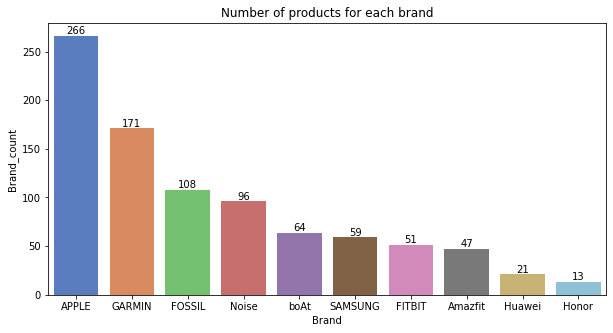

In [27]:
plt.figure(figsize=(10,5))
pal = sns.color_palette("muted", len(df1))  
rank = df1["Brand_count"].argsort()
ax = sns.barplot(x='Brand', y='Brand_count',
                 data=df1,
                 palette=np.array(pal[::-1])[rank])
plt.title('Number of products for each brand')
ax.bar_label(ax.containers[0])

# Products on Discount

In [28]:
df1[['Brand','Discount_count']].sort_values(by='Discount_count',ascending=False)

,Brand,Discount_count
1,GARMIN,136
3,Noise,94
4,boAt,64
5,SAMSUNG,54
2,FOSSIL,51
7,Amazfit,43
6,FITBIT,30
8,Huawei,17
9,Honor,13
0,APPLE,8


[Text(0, 0, '8'),
 Text(0, 0, '136'),
 Text(0, 0, '51'),
 Text(0, 0, '94'),
 Text(0, 0, '64'),
 Text(0, 0, '54'),
 Text(0, 0, '30'),
 Text(0, 0, '43'),
 Text(0, 0, '17'),
 Text(0, 0, '13')]

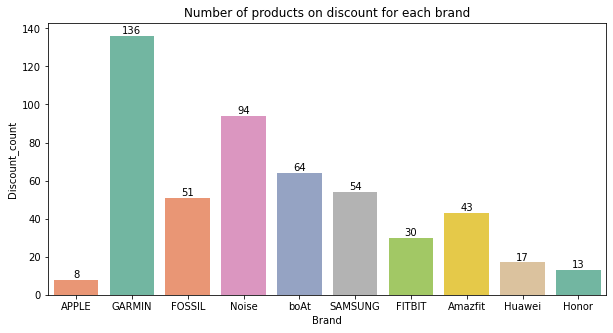

In [29]:
plt.figure(figsize=(10,5))
df1['Discount_count'].sort_values(ascending=False)
pal = sns.color_palette("Set2", len(df1))  
rank1 = df1["Discount_count"].argsort()
ax = sns.barplot(x='Brand', y='Discount_count',
                 data=df1,
                 palette=np.array(pal[::-1])[rank1])
plt.title('Number of products on discount for each brand')
ax.bar_label(ax.containers[0])

# Memory

In [30]:
df1[['Brand','Avg_memory']].sort_values(by='Avg_memory',ascending=False)

,Brand,Avg_memory
0,APPLE,23.849624
5,SAMSUNG,9.288136
9,Honor,3.384615
2,FOSSIL,2.101852
8,Huawei,1.761905
1,GARMIN,0.707602
3,Noise,0.000000
4,boAt,0.000000
6,FITBIT,0.000000
7,Amazfit,0.000000


[Text(0, 0, '23.8496'),
 Text(0, 0, '0.707602'),
 Text(0, 0, '2.10185'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '9.28814'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1.7619'),
 Text(0, 0, '3.38462')]

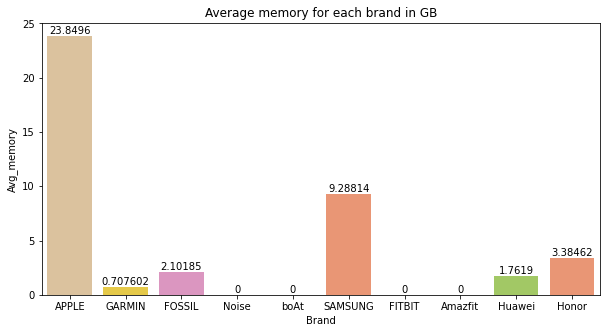

In [31]:
plt.figure(figsize=(10,5))
df1['Avg_memory'].sort_values(ascending=False)
pal = sns.color_palette("Set2", len(df1))  
rank1 = df1["Avg_memory"].argsort()
ax = sns.barplot(x='Brand', y='Avg_memory',
                 data=df1,
                 palette=np.array(pal[::-1])[rank1])
plt.title('Average memory for each brand in GB')
ax.bar_label(ax.containers[0]) 

# Maximum and Minimum MRP

In [32]:
df1[['Brand','Max_MRP','Min_MRP']].sort_values(by='Max_MRP',ascending=False)

,Brand,Max_MRP,Min_MRP
1,GARMIN,139990.0,8990.0
0,APPLE,89900.0,20900.0
5,SAMSUNG,60241.0,15885.0
8,Huawei,30990.0,9999.0
6,FITBIT,26499.0,9900.0
7,Amazfit,25999.0,4999.0
2,FOSSIL,24995.0,7036.0
9,Honor,20999.0,10999.0
4,boAt,11999.0,5990.0
3,Noise,8999.0,3999.0


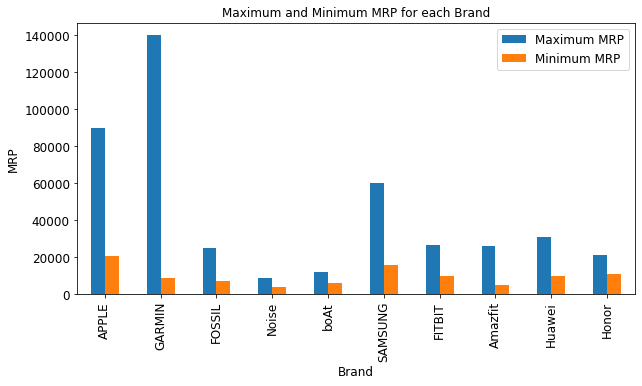

In [33]:
df_mrp=df1[['Brand','Max_MRP','Min_MRP']]
plt.rcParams["figure.figsize"] = (10,5)
df_mrp.plot(x='Brand',fontsize=12,
        kind='bar',
        stacked=False,
        title='Maximum and Minimum MRP of each Brand')
plt.xlabel('Brand',fontsize=12)
plt.ylabel('MRP',fontsize=12)
plt.title('Maximum and Minimum MRP for each Brand',fontsize=12)
plt.legend(["Maximum MRP", "Minimum MRP"],fontsize=12)
plt.show()     

# Maximum and Minimum Sale Price

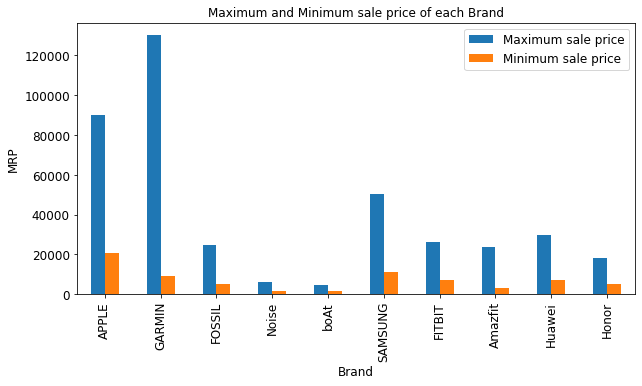

In [34]:
plt.rcParams["figure.figsize"] = (10,5)
df_sale=df1[['Brand','Max_sale_price','Min_sale_price']]
df_sale.plot(x='Brand',fontsize=12,
        kind='bar',
        stacked=False,
        title='Maximum and Minimum sale price of each Brand')
plt.xlabel('Brand',fontsize=12)
plt.ylabel('MRP',fontsize=12)
plt.title('Maximum and Minimum sale price of each Brand',fontsize=12)
plt.legend(["Maximum sale price", "Minimum sale price"],fontsize=12)
plt.show()      

# Average rating

In [35]:
df1[['Brand','Avg_rating']].sort_values(by='Avg_rating',ascending=False)

,Brand,Avg_rating
0,APPLE,4.475940
9,Honor,4.346154
5,SAMSUNG,4.054237
8,Huawei,3.938095
2,FOSSIL,3.776852
4,boAt,3.775000
3,Noise,3.501042
7,Amazfit,3.278723
6,FITBIT,2.719608
1,GARMIN,1.899415


[Text(0, 0, '4.47594'),
 Text(0, 0, '1.89942'),
 Text(0, 0, '3.77685'),
 Text(0, 0, '3.50104'),
 Text(0, 0, '3.775'),
 Text(0, 0, '4.05424'),
 Text(0, 0, '2.71961'),
 Text(0, 0, '3.27872'),
 Text(0, 0, '3.9381'),
 Text(0, 0, '4.34615')]

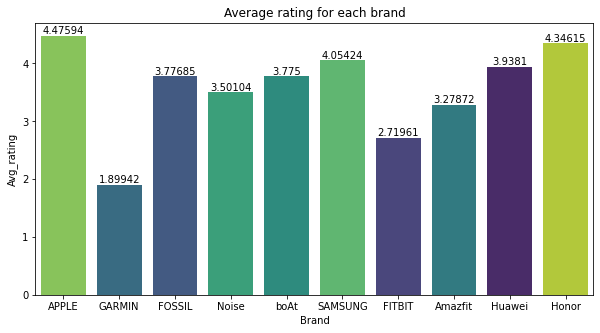

In [36]:
plt.figure(figsize=(10,5))
pal = sns.color_palette("viridis", len(df1))  
rank2 = df1['Avg_rating'].argsort()
ax = sns.barplot(x='Brand', y='Avg_rating',
                 data=df1,
                 palette=np.array(pal[::-1])[rank2])
plt.title('Average rating for each brand')
ax.bar_label(ax.containers[0])

# No. of ratings vs No. of reviews

In [37]:
df1[['Brand','Avg_no_of_ratings','Avg_no_of_reviews']]

,Brand,Avg_no_of_ratings,Avg_no_of_reviews
0,APPLE,3374.492481,292.060150
1,GARMIN,9.859649,1.228070
2,FOSSIL,517.944444,54.675926
3,Noise,34504.218750,3563.062500
4,boAt,98713.078125,8781.171875
5,SAMSUNG,4467.050847,437.542373
6,FITBIT,1080.411765,105.686275
7,Amazfit,1008.425532,96.978723
8,Huawei,725.380952,114.666667
9,Honor,5215.538462,748.384615


# Average  discount percentage Vs Average no. of ratings

/tmp/ipykernel_42863/654117879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Avg_discount%'] = df3['Avg_discount%'] /df3['Avg_discount%'].abs().max()
/tmp/ipykernel_42863/654117879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Avg_no_of_ratings'] = df3['Avg_no_of_ratings'] /df3['Avg_no_of_ratings'].abs().max()


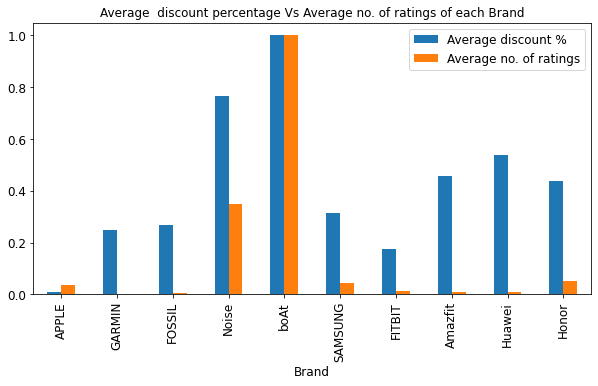

In [39]:
df3=df1[['Brand','Avg_discount%','Avg_no_of_ratings']]
df3['Avg_discount%'] = df3['Avg_discount%'] /df3['Avg_discount%'].abs().max()
df3['Avg_no_of_ratings'] = df3['Avg_no_of_ratings'] /df3['Avg_no_of_ratings'].abs().max()
plt.rcParams["figure.figsize"] = (10,5)
df3.plot(x='Brand',fontsize=12,
        kind='bar',
        stacked=False,
        title='Maximum and Minimum Sale price of each Product')
plt.xlabel('Brand',fontsize=12)
# plt.ylabel('Sale Price',fontsize=12)
plt.title('Average  discount percentage Vs Average no. of ratings of each Brand',fontsize=12)
plt.legend(["Average discount %", "Average no. of ratings"],fontsize=12)

# Product count Vs Minimum and Maximum sale price

/tmp/ipykernel_42863/4077110670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Brand_count'] = df4['Brand_count'] /df4['Brand_count'].abs().max()
/tmp/ipykernel_42863/4077110670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Min_sale_price'] = df4['Min_sale_price'] /df4['Min_sale_price'].abs().max()
/tmp/ipykernel_42863/4077110670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

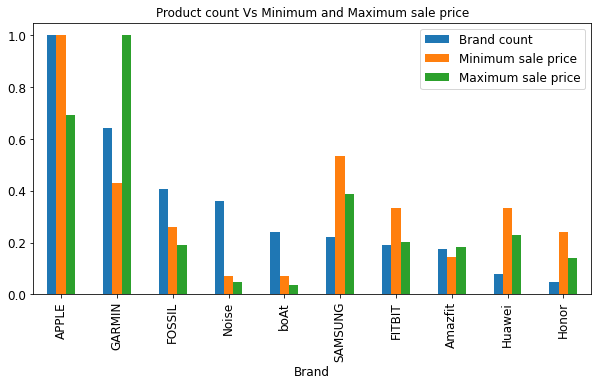

In [40]:
df4=df1[['Brand','Brand_count','Min_sale_price','Max_sale_price']]
df4['Brand_count'] = df4['Brand_count'] /df4['Brand_count'].abs().max()
df4['Min_sale_price'] = df4['Min_sale_price'] /df4['Min_sale_price'].abs().max()
df4['Max_sale_price'] = df4['Max_sale_price'] /df4['Max_sale_price'].abs().max()

plt.rcParams["figure.figsize"] = (10,5)
df4.plot(x='Brand',fontsize=12,
        kind='bar',
        stacked=False,
        title='Brand count Vs Minimun sale price')
plt.xlabel('Brand',fontsize=12)
# plt.ylabel('Sale Price',fontsize=12)
plt.title('Product count Vs Minimum and Maximum sale price',fontsize=12)
plt.legend(["Brand count", "Minimum sale price","Maximum sale price"],fontsize=12)

# Text Data Visualization

In [41]:
df['Description'] = df['Description'].astype(str)
df = df[~df["Description"].isnull()]

In [42]:
def clean(txt):
    txt = txt.str.replace("()", "")
    txt = txt.str.replace("{}", "")
    txt = txt.str.replace('(<a).*(>).*()', '')
    txt = txt.str.replace('(&amp)', '')
    txt = txt.str.replace('(&gt)', '')
    txt = txt.str.replace('(&lt)', '')
    txt = txt.str.replace('(\xa0)', ' ')  
    return txtdf['Description'] == clean(df['Description'])

In [43]:
df['Description1'] = df['Description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Description1'] = df['Description1'].str.replace('[^\w\s]', '')

/tmp/ipykernel_42863/3237832430.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Description1'] = df['Description1'].str.replace('[^\w\s]', '')


In [44]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Description1'] = df['Description1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Description1'].head()

[nltk_data] Downloading package stopwords to /home/aparna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    check heart rate get notifications low high he...
1    sales package smartwatch strap 1m magnetic cha...
2    powerful features help keep connected active h...
3    largest advanced alwayson retina display yet m...
4    largest advanced alwayson retina display yet m...
Name: Description1, dtype: object

In [45]:
freq = pd.Series(' '.join(df['Description1']).split()).value_counts()
less_freq = list(freq[freq ==1].index)
less_freq[0:5]

['harness', '138215', 'quickrelease', 'ftw6018', '265']

In [46]:
df['Description1'] = df['Description1'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))

In [47]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Description1'] = df['Description'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [48]:
df['Description1'] = df['Description1'].str.replace('[^\w\s]', '')
df['Description1'].head()

/tmp/ipykernel_42863/1133777613.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Description1'] = df['Description1'].str.replace('[^\w\s]', '')


0    check your heart rate and get notif for low an...
1    sale package smartwatch strap 1m magnet charg ...
2    with power featur to help keep you connected a...
3    the largest most advanc alwayson retina displa...
4    the largest most advanc alwayson retina displa...
Name: Description1, dtype: object

In [49]:
df['Description_len'] = df['Description'].astype(str).apply(len)
df['word_count'] = df['Description'].apply(lambda x: len(str(x).split()))

In [50]:
text = " ".join(Description for Description in df.Description1)

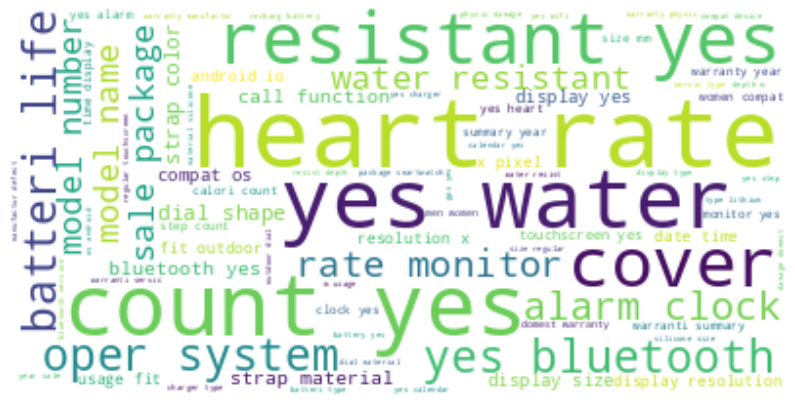

In [51]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Description1'], 20)
df2 = pd.DataFrame(common_words, columns = ['Description', 'count'])
df2.head()

,Description,count
0,yes,9965
1,display,3877
2,type,2344
3,warranty,2269
4,sensor,2040


<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='count'>

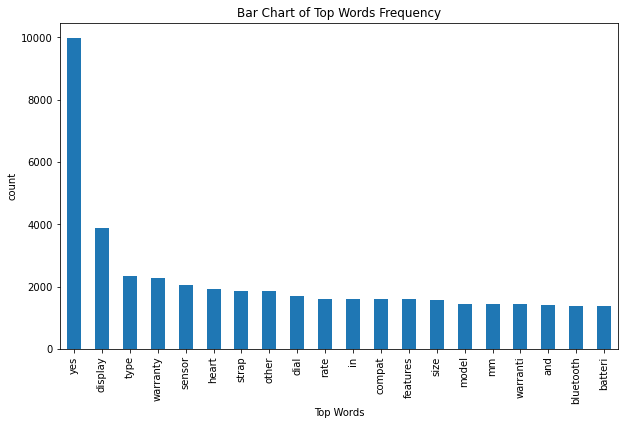

In [53]:
df2.groupby('Description').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "count",
    title = "Bar Chart of Top Words Frequency"
)

In [54]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(df['Description1'], 30)
df3 = pd.DataFrame(common_words2, columns=['Description', "Count"])
df3.head()

,Description,Count
0,heart rate,1577
1,count yes,1213
2,yes water,1184
3,in warranty,1127
4,cover in,1121


<AxesSubplot:title={'center':'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

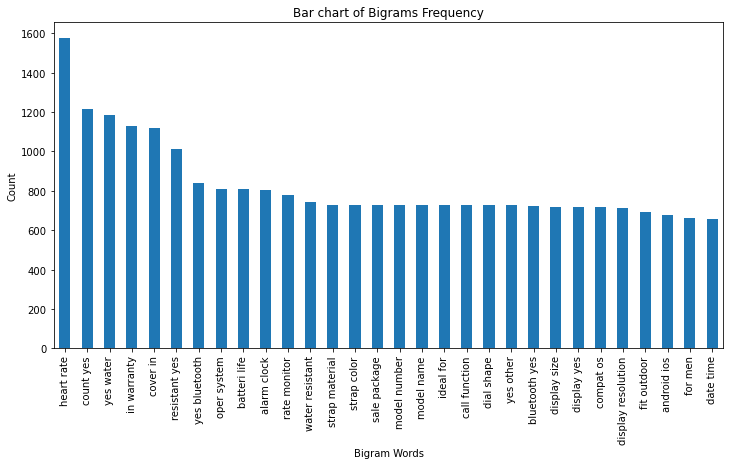

In [55]:
df3.groupby('Description').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)